# The mean shift clustering in Poincaré ball space

https://towardsdatascience.com/speeding-up-your-code-1-the-example-of-the-mean-shift-clustering-in-poincar%C3%A9-ball-space-d46169bfdfc8

On May 2017, in the world of Artificial Intelligence, a paper was published by Maximilian Nickel and Douwe Kiela from the Facebook AI Research. The content of that paper promise to have a huge impact in the world of [Representation Learning](https://en.wikipedia.org/wiki/Feature_learning).

The Representation Learning techniques, rawly speaking, have the goal of translate the “meaning” of objects (e.g. words) which belongs to a collection (e.g. a book), taking account of the properties (e.g. semantics) that exist between them, with the goal of have a basis that can be thereafter used by AI algorithms. 

**The better are the objects represented, the more effective will be the subsequent algorithms.**

The cutting edge of these techniques use **embeddings**:
- Each object is represented by a point in a multi-dimensional space, and that point will “embed” ideally all the properties the object has with respect to the collection. 
- As consequence, object with similar meaning will found their embeddings geometrically near each other. And that’s why I had to build a clustering algorithm.
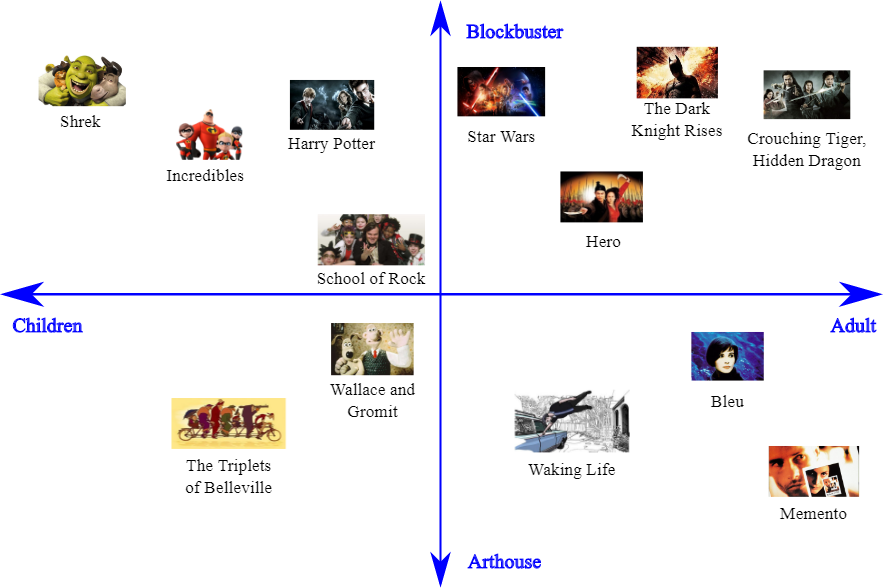

This multi-dimensional space usually is of the “flat” type, i.e. has the geometrical properties that we see in our real space, the ones that we studied at the school.

Instead, in the mentioned paper they use a particular, “curved” space: the **Poincaré ball model**.
- This because those kind of spaces are very good in representing hierarchies, and so the latent hierarchies present in the collections are easily represented. 
- And in facts, they show state-of-the-art results in many fields using spaces with much lower dimensionality.

# How this Poincaré ball looks like? 

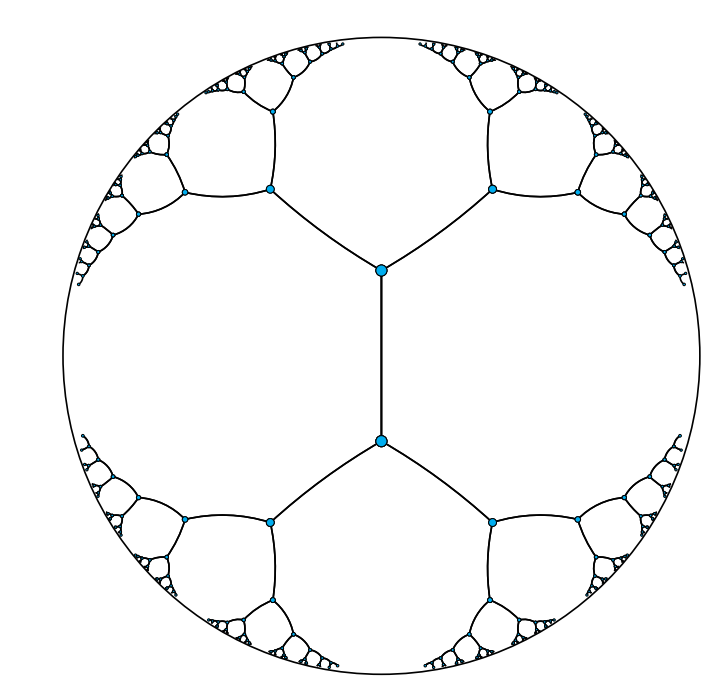

As example, below there are two representations in 2-d ball (i.e. a circle). 
- The arcs that you see are the so called [geodesics](https://en.wikipedia.org/wiki/Geodesic), i.e. the shortest walk-through between two points. 
- That’s one of the most evident differences with respect to the “flat” euclidean space, where the shortest walk-through between points is a straight line. 
- Another big difference is that nothing can exist outside the circle: actually, points which are at a very big distance from the center (“at infinity”) lie on the disk circumference. 
- And so, the arcs that connect the points you see in the figure on the left have all the same length. Mind blowing, isn’t it?

# The goal

I had to build an algorithm which groups together points that are near to each other in such space. And I needed this algorithm to work without specifying a priori the number of clusters. I choose then the **mean shift procedure**.

This procedure shifts every point towards its nearest bulk of points, and a single parameter defines how far is the nearest bulk. If the nearest bulk is too far, the point will form himself a lone cluster.

Here an animation of the result in a 2-d Poincaré disk, where the algorithm will end with 13 clusters:`

![SegmentLocal](https://miro.medium.com/max/792/1*SrVWzTejlFfhhAgSJEYYpQ.gif "segment")

You can notice that points near the boundary of the circle, for which the relative distance seems to be small, don’t clusterize. In opposite, points near the center of the circle, for which the relative distance seem to be bigger than the peripheral one, actually do clusterize.

That’s an effect of the curved space where we are, the Poincaré ball: as I already mentioned, the more you move from the center, the more the distance are actually bigger then what you see in the picture.

Many details can be said, but that goes beyond the scope of this post. But if you want to know more about the mean shift procedure and the fancy Poincaré ball space model, just search the web, there are plenty of resources.

# Implementation

Descriptively, for implement mean shift procedure we have to substitute each point, P, with the weighted sum of all the other points. The weight to apply to each point depends on the distance it has with the considered one (P). And this procedure has to be repeated until all the points are clustered.

You can find several implementations of this algorithm on the web, for basically every programming language. But no one of them will work in this space!

The reason is the way we calculate distances between points. All those algorithms are made for working in the “flat” euclidean space, and so they compute the distances between points in the euclidean way. Instead, in this specific space the distance is more complicated.

So, here is the basic code, wrote with Python and Numpy. I took this version from the wonderful course from Jeremy Howard:

In [180]:
def meanshift(data, sigma, steps):
    d1 = np.copy(data)                        # Need to copy the data, don't want to modify the originals
    for it in range(steps):                   # at each step
        for i, p in enumerate(d1):            # for each point
            dists = dist_poinc(p, d1)        # we calculate the distance from that point to all the other ones
            weights = gaussian(dists, sigma)  # then we weight those distances by our gaussian kernel
            d1[i] = (np.expand_dims(weights,1)*d1).sum(0) / weights.sum()     # and substitute the point with the weighted sum
    return d1

In [215]:
import numpy as np
data = np.random.random((100,4))
row_sums = data.sum(axis=1)
data = data / row_sums[:, np.newaxis]
print(data)

meanshift(data, 0.2, 100)

[[8.14249007e-02 1.62660540e-01 2.57359725e-01 4.98554835e-01]
 [3.22296295e-02 2.54989136e-01 3.31565770e-01 3.81215464e-01]
 [4.12457171e-01 6.63600344e-02 3.13554498e-01 2.07628297e-01]
 [3.84896911e-01 3.01916363e-01 2.27680343e-01 8.55063830e-02]
 [3.66766881e-01 1.66456954e-01 1.58497582e-01 3.08278583e-01]
 [2.70672014e-02 1.02388703e-01 3.99182647e-01 4.71361449e-01]
 [2.51683450e-01 2.93917324e-01 2.86380081e-01 1.68019145e-01]
 [3.35349092e-03 3.77616145e-01 3.33755170e-01 2.85275194e-01]
 [4.85028574e-02 3.04414522e-01 3.06218784e-01 3.40863837e-01]
 [2.10616550e-01 2.81525367e-01 2.25553725e-01 2.82304358e-01]
 [2.08636288e-01 4.22042525e-01 3.42913647e-01 2.64075397e-02]
 [9.22408326e-02 3.85650088e-01 1.60622561e-01 3.61486518e-01]
 [3.52975215e-02 2.38096264e-01 5.88713278e-01 1.37892937e-01]
 [3.99925480e-01 9.89938002e-02 2.58934711e-01 2.42146010e-01]
 [3.51432853e-01 1.58965989e-01 2.80255632e-01 2.09345527e-01]
 [2.92885626e-01 1.80099861e-02 4.38929453e-01 2.501749

array([[0.24285938, 0.23635257, 0.26832524, 0.25246282],
       [0.24285938, 0.23635257, 0.26832523, 0.25246282],
       [0.24285938, 0.23635257, 0.26832523, 0.25246282],
       [0.24285939, 0.23635257, 0.26832523, 0.25246282],
       [0.24285939, 0.23635256, 0.26832523, 0.25246282],
       [0.24285939, 0.23635256, 0.26832523, 0.25246282],
       [0.24285939, 0.23635256, 0.26832523, 0.25246282],
       [0.24285939, 0.23635256, 0.26832523, 0.25246282],
       [0.2428594 , 0.23635256, 0.26832523, 0.25246282],
       [0.2428594 , 0.23635256, 0.26832522, 0.25246282],
       [0.2428594 , 0.23635256, 0.26832522, 0.25246282],
       [0.2428594 , 0.23635256, 0.26832522, 0.25246282],
       [0.24285941, 0.23635256, 0.26832522, 0.25246282],
       [0.24285941, 0.23635256, 0.26832522, 0.25246282],
       [0.24285941, 0.23635255, 0.26832522, 0.25246282],
       [0.24285941, 0.23635255, 0.26832522, 0.25246282],
       [0.24285942, 0.23635255, 0.26832521, 0.25246282],
       [0.523548  , 0.11260181,

For completeness, the definition of distance between points in the Poincaré ball model is:
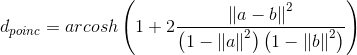

This is a general meanshift implementation. For our case, the difference is in the way we define the difference between points:

In [211]:
import math
def _dist_poinc(a, b):
    num=np.dot(a-b, a-b)
    den1=1-np.dot(a,a)
    den2=1-np.dot(b,b)
    return np.arccosh(1+ 2* (num) / (den1*den2))
def dist_poinc(a, A):
    res=np.empty(A.shape[0])
    for i, el in enumerate(A):
        res[i]=_dist_poinc(a, el)
    return res
def gaussian(d, bw):
    return np.exp(-0.5*(d/bw)**2) / (bw*np.sqrt(2*np.pi))

As you can see, the broadcasting capabilities of Numpy help a lot in write simple code. To have a grasp about broadcasting, look at the Gaussian function: it accept as input two elements (d as distance and bw as bandwidth). Both of them can be numbers, or any n-dimensional array (vectors, matrices, tensors), and if their shape are compatible Numpy will understand how to treat them in a proper manner. In our example we feed the function with a vector (dists) and a number (sigma).

So, it’s done? Yes and no. It works, the animation you saw before is made with this algorithm. But is slow: on my laptop (i7–4750HQ CPU @ 2.00GHz, 8GB RAM) for cluster 1200 points it needs 14 seconds for each step, and ten steps are needed for the algorithm to converge.

# Speed up the code - Vectorized element-wise product

Suppose we have two arrays:


and we want to obtain as result an array where the elements are the element-wise multiplication of them:


We can do it in two ways: with a loop over the elements, or with a vectorized operation. Now: what happens in terms of execution time? I did this calculations with arrays of different dimensions, ranging from 100.000 to 10.000.000.
![image1.png](https://miro.medium.com/max/380/1*YnS62402C1lg826m8Vhndw.png)
![image2.png](https://miro.medium.com/max/399/1*SdJ8OYFY8IgpMGMJKxH84g.png)

In the right plot you see the execution times of the two operations: the vectorized version is MUCH faster than the looped one. How much faster? You see this in the first plot: the vectorized version is executed in less than 1.3% of the time!

Actually when we use the **broadcasting capabilities of Numpy** like we did in the previous post, under the hood all the operations are automatically vectorized. So using broadcasting not only speed up writing code, it’s also faster the execution of it! In the vectorized element-wise product of this example, in fact I used the Numpy np.dot function.

# Vectorizing the loop in the distance function

Let’s begin with the loop in the distance function. From the previous post:

In [1]:
def _dist_poinc(a, b):
    num=np.dot(a-b, a-b)
    den1=1-np.dot(a,a)
    den2=1-np.dot(b,b)
    return np.arccosh(1+ 2* (num) / (den1*den2))

def dist_poinc(a, A):
    res=np.empty(A.shape[0])
    for i, el in enumerate(A):
        res[i]=_dist_poinc(a, el)
    return res

We execute this function **for each vector of the collection**: that’s one of the loops we want to avoid. 

And we feed the function with all the vectors, one at a time (a) together with the whole collection (A): that’s **the other loop which we will vectorize**.

If you change the perspective, you can see the collection of vectors as a matrix, and the vectors becomes just rows of the matrix. In this vision, the operations between the vectors becomes operations between the rows of the matrix. For example, 1000 vectors with two components will make a (1000,2) matrix:
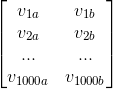

Let’s step back to the original formula, and focus at each part of it separately:
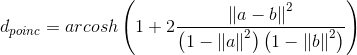

where the double pipe character (like ||a||) means the euclidean norm.

For better visualize the following operations, I will simplify the notation by omitting the vectors’ components. 
- So when I will write v1, you have to remember that that vector has his own components.
    - v1 = [0.1, 0.2, 0.15, .... ]
- As consequence, the 2-d matrices which contains vectors will be 3-d matrices, with the vectors’ components along the third, hidden, dimension.

## The numerator
In the numerator of the fraction we have to do a subtraction between vectors, before calculating the squared norm. And we want to vectorize it, i.e. make all the subtractions in a single passage. In other words, we want to obtain this matrix:
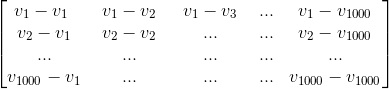

This will be a symmetric matrix (element (1,2) is equal to element (2,1), etc) and will have all the diagonal elements equal to zero. This means that we actually double the calculations, but that’s the better way of proceed along the next operations.

For obtaining such a matrix it’s convenient to leverage on the broadcasting capabilities of Numpy. 

As example, if we focus for a moment to the first row of it, which is composed by the differences between v1 and all the vectors of the collection S, we can obtain it by simply call the subtraction **v1-S**.

And given that we have to do the same operation with all the vectors, we have to execute the following operation:
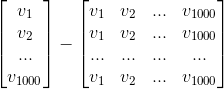

At this point we have to calculate the squared norm of the obtained elements, i.e. we have to square everything in the matrix and then sum up those squares along the vectors’ component axis, which is the omitted third dimension in the matrices, as already said.

In [37]:
def num(points):
    expd=np.expand_dims(points,2) #need another dimension...
    tiled=np.tile(expd, points.shape[0]) #...to tile up the vectors
    trans=np.transpose(points) #Also need to transpose the points matrix to fit well with broadcasting
    diff=trans-tiled           #doing the difference, exploiting Numpy broadcasting capabilities
    num=np.sum(np.square(diff), axis=1) #an then obtain the squared norm of the difference
    return num

In [39]:
import numpy as np
points = np.random.random((5,4))
num(points)

array([[0.        , 0.4706931 , 0.68933667, 0.56679749, 0.84833762],
       [0.4706931 , 0.        , 0.44963372, 0.0979211 , 0.45401683],
       [0.68933667, 0.44963372, 0.        , 0.24805347, 0.27458283],
       [0.56679749, 0.0979211 , 0.24805347, 0.        , 0.50639812],
       [0.84833762, 0.45401683, 0.27458283, 0.50639812, 0.        ]])

## The denominator

Now the denominator. The two operands between parenthesis can actually be seen as an operation within the same matrix, because we are treating all the vectors at the same time. So beforehand we calculate the squared norm of all the vectors, then subtract the obtained vector from a vector composed by ones. Using broadcasting:


Now, to obtain the matrix with all the denominator terms we have to multiply this vector by the transpose of himself:
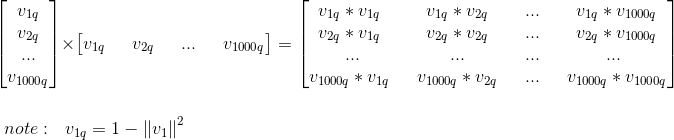

In [41]:
def den(points):
    sq_norm=1-np.sum(np.square(points),1) #subtracting from 1 the squared norm of the vectors
    expd=np.expand_dims(sq_norm,1)   #this operation is needed to obtain a correctly transposed version of the vector
    den_all=expd * expd.T #multiply the object by his transpose
    return den_all

In [42]:
import numpy as np
points = np.random.random((5,4))
den(points)

array([[ 3.08731427e-01, -3.70517503e-03, -1.59277120e-01,
         1.15946580e-01,  4.33337994e-01],
       [-3.70517503e-03,  4.44668757e-05,  1.91153072e-03,
        -1.39150839e-03, -5.20061444e-03],
       [-1.59277120e-01,  1.91153072e-03,  8.21723956e-02,
        -5.98178082e-02, -2.23562688e-01],
       [ 1.15946580e-01, -1.39150839e-03, -5.98178082e-02,
         4.35446740e-02,  1.62743582e-01],
       [ 4.33337994e-01, -5.20061444e-03, -2.23562688e-01,
         1.62743582e-01,  6.08236808e-01]])

## The whole distance formula, and the rest of mean shift

Now we have both the numerator and the denominator. All the rest of the operations to get the distances are just element-wise operations made with broadcasting (Thank you Numpy!):

In [43]:
def poinc_dist_vec(points):
    num=num(points)
    den=num(points)
    return np.arccosh(1+2*num/ den)

The function we built gives as result a matrix with the distances between points in the Poincaré ball:
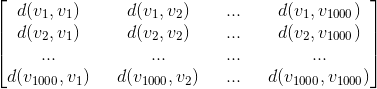

Now we have to adapt the main function to use this matrix for running the mean shift algorithm, and at the same time we will get rid of the other loop.

Recalling the mean shift algorithm, we have to calculate the weights using a Gaussian kernel. For doing this we can use the same function we already prepared, because thanks to broadcasting it will work for a matrix too, and we will get as result a matrix with the same shape.

Then we have to use this matrix to weight all the vectors of the collection. This is a usual matrix product:
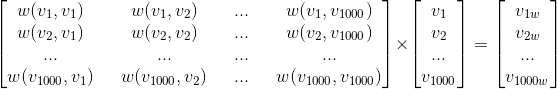

And we have also to normalize each vector by the sum of the weights needed to build it. 

As example, for having the normalized version of v1w we have to divide it by the sum w(v1,v1) + w(v1,v2) + …. + w(v1, v1000).

So we have to sum up the weight matrix along the rows, obtaining an array of summed weights that we will use for divide element-wise the weighted vectors.

In [ ]:
def gaussian(d, bw):
    return np.exp(-0.5*(d/bw)**2) / (bw*np.sqrt(2*np.pi))

def meanshift_vec(points):
    dists=poinc_dist_vec(points) #the matrix of the distances
    weights = gaussian(dists, sigma) #the matrix of the weights
    expd_w=np.dot(weights, points) #the weighted vectors
    summed_weight=np.sum(weights,0) # the array of the summed weights, for normalize the weighted vectors
    shifted_pts=expd_w/np.expand_dims(summed_weight,1) #the normalized vectors
    return shifted_pts

# Experimental Comparison

Now let’s see how much is faster with respect to the looped version. The following plots are made running both the algorithms with collections of two dimensional vectors.
![image1.png](https://miro.medium.com/max/399/1*GmTPyZMPlMyNBVX2sA21yw.png)
![image1.png](https://miro.medium.com/max/392/1*ZgjIODawph1CH70BGczTCQ.png)

As expected, the vectorized version is much faster then the looped one: with 10.000 2-d vectors it took 844 seconds for execute the looped algorithm, while the vectorized version it’s executed in just 28 seconds. It’s to be said that the execution speed decrease with big dataset. This is an expected behavior, because for N vectors we deal with N² tensor elements.

Now: what if we want to make it faster? And what if the number of vectors are so big that they cannot fit in memory?

(to be continued)